In [6]:
from qiskit import *
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector, plot_histogram
import math

In [7]:
qr = QuantumRegister(3)

In [8]:
cr =ClassicalRegister(3)

In [9]:
ckt=QuantumCircuit(qr,cr)

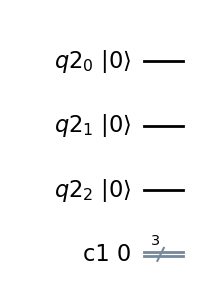

In [10]:
%matplotlib inline
ckt.draw(output='mpl',initial_state=True)

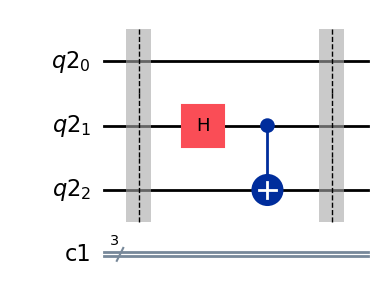

In [11]:
#ckt.x(0)
ckt.barrier()
ckt.h(1)
ckt.cx(1,2)
ckt.barrier()
ckt.draw(output='mpl')

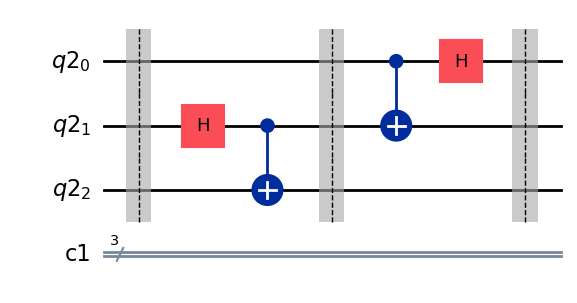

In [12]:
ckt.cx(0,1)
ckt.h(0)
ckt.barrier()
ckt.draw(output='mpl')

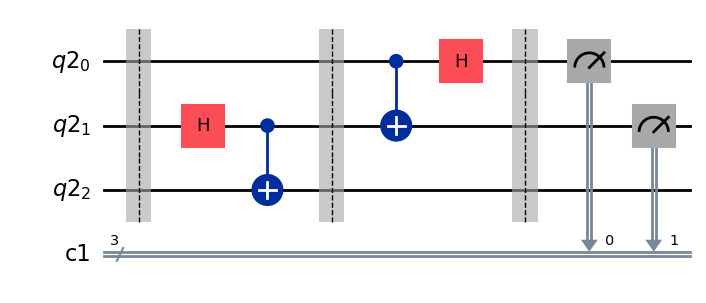

In [13]:
ckt.measure([0,1],[0,1])
ckt.draw(output='mpl')


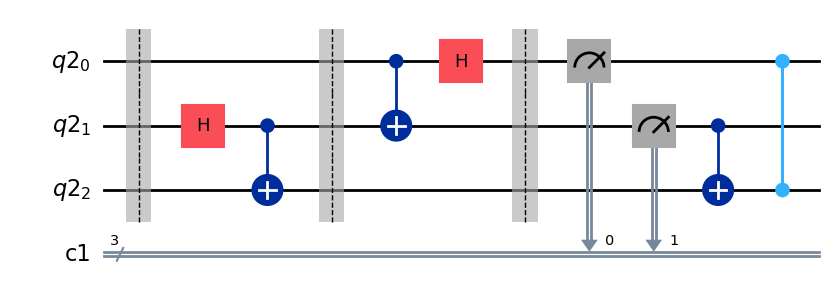

In [14]:
ckt.cx(1,2)
ckt.cz(0,2)
ckt.draw(output='mpl')

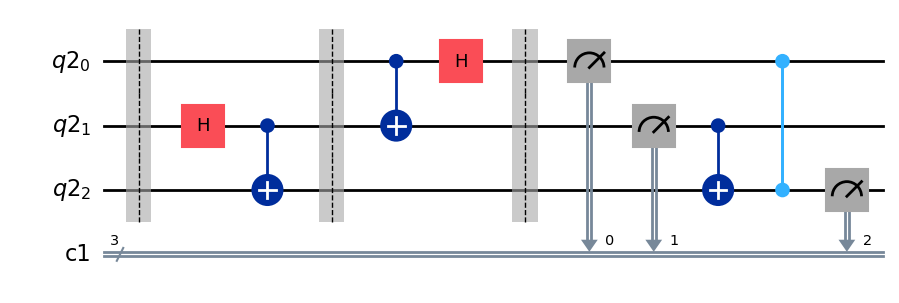

In [15]:
ckt.measure(2,2)
ckt.draw(output='mpl')

       ░            ░      ┌───┐ ░ ┌─┐              
q2_0: ─░────────────░───■──┤ H ├─░─┤M├─────────■────
       ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐      │    
q2_1: ─░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├──■───┼────
       ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘┌─┴─┐ │ ┌─┐
q2_2: ─░──────┤ X ├─░────────────░──╫──╫─┤ X ├─■─┤M├
       ░      └───┘ ░            ░  ║  ║ └───┘   └╥┘
c1: 3/══════════════════════════════╩══╩══════════╩═
                                    0  1          2 
{'001': 1}


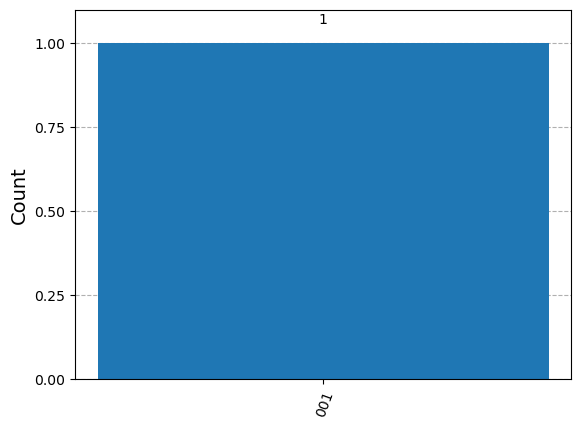

In [16]:
    print(ckt)
    
    #chosing backend and executing job
    backend = AerSimulator()
    
    # First we have to transpile the quantum circuit 
    # to the low-level QASM instructions used by the 
    # backend
    qc_compiled = transpile(ckt, backend)
    
    # Execute the circuit on the qasm simulator.
    # We've set the number of repeats of the circuit
    # to be 1024, which is the default.
    job_sim = backend.run(qc_compiled, shots=1)
    
    # Grab the results from the job.
    result_sim = job_sim.result()
    
    counts = result_sim.get_counts(qc_compiled)
    print(counts)
    plot_histogram(counts)
    